In [24]:
!wget "https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py"
!wget "https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkplot.py"

--2020-04-17 05:39:02--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47512 (46K) [text/plain]
Saving to: ‘thinkdsp.py.2’

thinkdsp.py.2       100%[===================>]  46.40K  --.-KB/s    in 0.02s   

2020-04-17 05:39:02 (1.82 MB/s) - ‘thinkdsp.py.2’ saved [47512/47512]

--2020-04-17 05:39:04--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkplot.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22756 (22K) [text/plain]
Saving to: 

In [0]:
# [Sol]
from thinkdsp import Sinusoid
import numpy as np

class Jw_Sawtooth(Sinusoid):
    """Jw Represents a sawtooth signal."""
    def evaluate(self, ts):
        θ= ts * 2 * np.pi * self.freq + self.offset # 在此作橫軸之變數變換
        θ= θ % (np.pi * 2) # 這一行讓 θ 周而復始，週期維持在 (2 π)
        x= -1 + θ/np.pi # 從 -1 開始爬坡，上半週期到達　0,下半周期到達 +1   
        x= x * self.amp # 最後輸出前，再把縱軸拉到 振幅 = amp
        return x

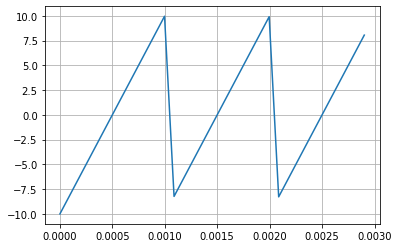

In [28]:
# Let's test what we have created
import matplotlib.pylab as plt

x= Jw_Sawtooth(freq=1000,amp=10)
x.plot()
plt.grid()

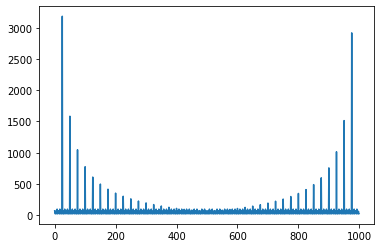

In [29]:
# make its spectrum
w= x.make_wave()
s= w.make_spectrum()
s.plot(high=1000)

# you will see the spectrum has both odd and even multiples of 100 Hz